# SimCenter Programming Bootcamp: Web scrabbing using python

## by Wael Elhaddad
(ported to jupyter notebooks by Peter Mackenzie-Helnwein)

University of California at Berkeley, CA, United States

## Part 1: "Request"

Loading the supporting modules

In [1]:
import requests

In [2]:
#Let's request the tall buildings information
response = requests.get("https://data.sfgov.org/resource/5kya-mfst.json")


In [3]:
#Let's check the response is OK (return code 200)
if(response.status_code == 200):
    #We will convert the response to json 
    tallBuildings = response.json()
    
    #we will read the first building in the response and print some information
    building = tallBuildings[0]
    print("Building Name", ["name"])
    print("\tOccupancy: ", building["occupancy"])
    print("\tAddress: ", building["address"])


Building Name ['name']
	Occupancy:  Residential
	Address:  450 Folsom Street


### Excercise 1: Print to the screen the list of buildings 

including relevant information about the building like 
* structure type
* occupancy, 
* number of stories,
* total area.

In [4]:
tallBuildings[0]

{'objectid': '333',
 'polygon': {'type': 'Polygon',
  'coordinates': [[[-122.394933364, 37.78782009],
    [-122.39448986899998, 37.78746519],
    [-122.39405427, 37.787809283],
    [-122.393814643, 37.787998569],
    [-122.39424619099998, 37.788342877],
    [-122.394269178, 37.788337776],
    [-122.394768492, 37.787943353],
    [-122.394772886, 37.787946857],
    [-122.394933364, 37.78782009]]]},
 'name': '450 Folsom [Transbay Block 8]',
 'address': '450 Folsom Street',
 'mapblocklot': '3737042',
 'mbl_unique': '3737042',
 'date': '2019',
 'height_ft': '550',
 'stories_below_grade': '2',
 'occupancy': 'Residential',
 'structural_types': 'Unknown',
 'facade_material': 'glass',
 'foundation_system': 'Mat',
 'liquefaction_potential': 'Very High',
 'bedrockdepth_mean': '104',
 'bedrockdepth_max': '138',
 'bedrockdepth_min': '68',
 'completion_date': '2019',
 'collected_on': '2018-07-06T00:00:00.000',
 'primary_source': 'Peer Reviewers',
 'shape_length': '0.0028505426397520085',
 'shape_are

In [5]:
for building in tallBuildings:
    print("Building Name", ["name"])
    print("\tStructure type: ", building["structural_types"])
    print("\tOccupancy: ", building["occupancy"])
    print("\tAddress: ", building["address"])
    print("\tArea: ", building["shape_area"])

Building Name ['name']
	Structure type:  Unknown
	Occupancy:  Residential
	Address:  450 Folsom Street
	Area:  4.7227164433822106E-7
Building Name ['name']
	Structure type:  RC Shear Wall
	Occupancy:  Office (Management, Information, Professional Services)
	Address:  250 Howard Street
	Area:  2.685865008365523E-7
Building Name ['name']
	Structure type:  RC Shear Wall
	Occupancy:  Residential
	Address:  33 Tehama Street
	Area:  1.8332720773302768E-7
Building Name ['name']
	Structure type:  RC Shear Wall
	Occupancy:  Residential
	Address:  340 Fremont Street
	Area:  1.9986015611898653E-7
Building Name ['name']
	Structure type:  RC Shear Wall
	Occupancy:  Residential
	Address:  526 Mission Street
	Area:  1.3428554857703483E-7
Building Name ['name']
	Structure type:  RC Shear Wall
	Occupancy:  Office (Management, Information, Professional Services)
	Address:  350 Mission Street
	Area:  1.6967575321855257E-7
Building Name ['name']
	Structure type:  RC Shear Wall
	Occupancy:  Mixed Uses (Wit

### Excercise 2: Write the data from excercise 1 into a csv text file including latitude and longitude



### Exercise 3: Can we get PGA from USGS API for each building and include it in the output file

## Part 2: "Selenium"

For this part, you need to install an additional driver that depends upon your default web browser.

* Main page: https://www.selenium.dev/
* WebDriver (look for the **browser** section): https://www.selenium.dev/downloads/
   * chrome: https://sites.google.com/a/chromium.org/chromedriver/
   * safari: https://developer.apple.com/documentation/webkit/about_webdriver_for_safari
   * edge: https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/#downloads
* Selenium IDE:
   * chrome: https://chrome.google.com/webstore/detail/selenium-ide/mooikfkahbdckldjjndioackbalphokd
   * firefox: https://addons.mozilla.org/en-US/firefox/addon/selenium-ide/

Loading the supporting modules

In [22]:
import sys
import os
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup

In [26]:
#Starting the browser and opening tax assessor's data website for Anchorage
browser = webdriver.Chrome('./WebDriver') 
url = "https://www.muni.org/pw/public.html"
browser.get(url)


In [27]:
#Fill parcel search box with zero
parcelBox1 = browser.find_element_by_name("PAR1")
parcelBox1.send_keys('0')

#Click on Submit
submitButton = browser.find_element_by_name("submitbtn") 
submitButton.click()


In [28]:
for i in range(1,3):
    print("Processing results page {}".format(i))
    #Finding the parcels table with XPath
    parcelsTable = browser.find_elements_by_xpath("//table[1]/tbody/tr[2]/td/table[5]/tbody/tr")
    parcelsCount = len(parcelsTable)

    #Looping through the parcels table rows
    for i in range(1, parcelsCount):
        #extracting the parcel id
        parcelRow = browser.find_element_by_xpath("//table[1]/tbody/tr[2]/td/table[5]/tbody/tr[{}]".format(i+1))
        parcelIdCell = parcelRow.find_element_by_xpath(".//td[1]")
        if parcelIdCell is not None:
            parcelId = parcelIdCell.text
            
            #Clinking on the parcel to open the parcel details
            parcelIdCell.click()
            WebDriverWait(browser, 10)

            occupancy = 'unknown'
            #We can now parse the parcel details
            #e.g. let's find the occupancy
            try:
                parcelSoup = BeautifulSoup(browser.page_source, "html.parser")
                
                #We will assume the header is always the seventh table row (maybe using trial and error)
                parcelHeader = parcelSoup.findAll('tr')[7].text

                #We will read the header
                if('Residential' in parcelHeader):
                    occupancy = 'Residential'
                elif('Commercial' in parcelHeader):
                    occupancy = 'Commercial'

            except:
                "Error: Failed to process parcel: " + parcelId

            print("Parcel: {} is {}".format(parcelId, occupancy))

            #clicking on the back button
            backButton = browser.find_element_by_name("backbtn")
            backButton.click()
    #Going to next page in the search results       
    nextButton = browser.find_element_by_name("nextbtn")
    nextButton.click()

Processing results page 1
Parcel: 001-021-08-000 is Commercial
Parcel: 001-021-09-000 is Commercial
Parcel: 001-021-10-000 is Commercial
Parcel: 001-021-11-000 is Commercial
Parcel: 001-021-11-003 is Commercial
Parcel: 001-021-11-004 is Commercial
Parcel: 001-021-11-101 is Residential
Processing results page 2
Parcel: 001-021-11-101 is Residential
Parcel: 001-021-11-102 is Residential
Parcel: 001-021-11-103 is Residential
Parcel: 001-021-11-104 is Residential
Parcel: 001-021-11-105 is Residential
Parcel: 001-021-11-106 is Residential


### Excercise 4: Can we extract more information about these buildings
e.g. 
* number of stories, 
* year built, 
* area
* etc.

### Excercise 5: Now let's do this for ...

In [ ]:
"""
'ctl00_cph_txtStNum'      # number
'ctl00$cph$ddlStPre'      # prefix: N,E,S,NE,NW,SE,SW
'ctl00$cph$ddlStName'     # name
'ctl00$cph$ddlStType'     # type: ST, AVE, WAY, PL, ....
'ctl00$cph$ddlStSuf'      # suffix: N,E,S,NE,NW,SE,SW
'ctl00$cph$btnSrchAddr'   # search button
"""
'ctl00_cph_txtStNum'      # number
'ctl00$cph$ddlStPre'      # prefix: N,E,S,NE,NW,SE,SW
'ctl00$cph$ddlStName'     # name
'ctl00$cph$ddlStType'     # type: ST, AVE, WAY, PL, ....
'ctl00$cph$ddlStSuf'      # suffix: N,E,S,NE,NW,SE,SW
'ctl00$cph$btnSrchAddr'   # search button

## Further recommendations

Here is the package for data mining from the web that I used earlier: https://github.com/clips/pattern

Pattern is a web mining module for Python. It has tools for:

* Data Mining: web services (Google, Twitter, Wikipedia), web crawler, HTML DOM parser
* Natural Language Processing: part-of-speech taggers, n-gram search, sentiment analysis, WordNet
* Machine Learning: vector space model, clustering, classification (KNN, SVM, Perceptron)
* Network Analysis: graph centrality and visualization.

It is well documented, thoroughly tested with 350+ unit tests and comes bundled with 50+ examples. The source code is licensed under BSD.

<img src="https://raw.githubusercontent.com/clips/pattern/master/docs/g/pattern_schema.gif">

## Visualizing geospatial data

We recommend the **geopandas** library for easy visualization of GIS data.  You can find several easy to follow tutorials on youTube, e.g., 
* [Introduction to Visualizing Geospatial Data with Python GeoPandas](https://www.youtube.com/watch?v=IdxL5NZ7h_c) (~30 mins)
* [Introduction to Spatial Analysis in Python with Geopandas - Tutorial](https://www.youtube.com/watch?v=h5sy0z2BUTo) (~15 mins)

I am using example data files from th elatter video. Source: https://drive.google.com/drive/folders/1C_Zx4r-zRyc_9mNJ0XFZM4CDKuvtITaW

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt 
from mpl_toolkits.axes_grid1 import make_axes_locatable 

<ipython-input-9-dd918ed48388>:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world_data['area'] = world_data.area


<AxesSubplot:>

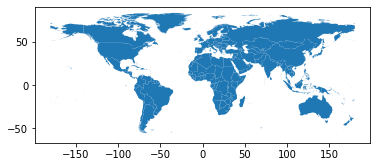

In [9]:
# Reading the world shapefile 
world_data = gpd.read_file('./GIS/Visualizing Geographical Data/world.shp')
world_data = world_data[['NAME', 'geometry']]

# Calculating the area of each country 
world_data['area'] = world_data.area

# Removing Antarctica from GeoPandas GeoDataframe
world_data = world_data[world_data['NAME'] != 'Antarctica']
world_data.plot()

#### Here with the recommended re-projection (see https://geopandas.org/projections.html#re-projecting)

<AxesSubplot:>

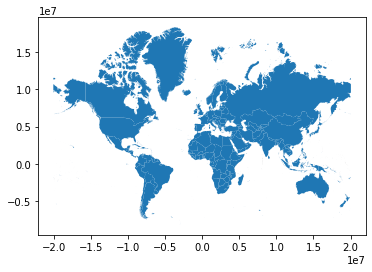

In [10]:
world_data.to_crs(epsg=3395).plot()

<AxesSubplot:>

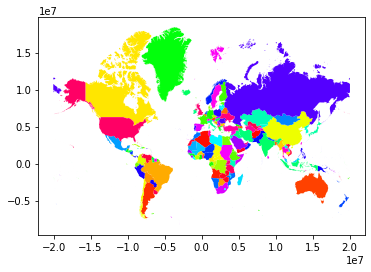

In [11]:
# Changing the projection and adding color
current_crs = world_data.crs   
world_data.to_crs(epsg = 3857, inplace = True)
world_data.plot(column = 'NAME', cmap = 'hsv')

<AxesSubplot:>

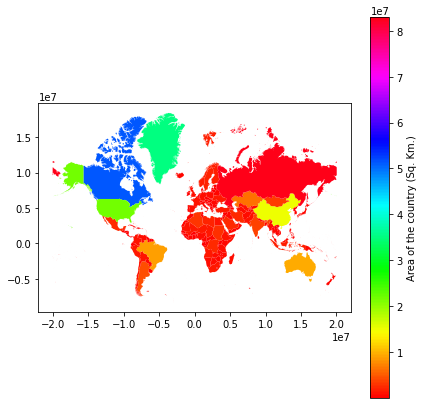

In [12]:
# Re-calculate the areas in Sq. Km.
world_data['area'] = world_data.area/1000000

# Adding a legend 
world_data.plot(column = 'area' , cmap = 'hsv' , legend = True, 
                legend_kwds = {'label': "Area of the country (Sq. Km.)"}, figsize = (7,7))


<AxesSubplot:>

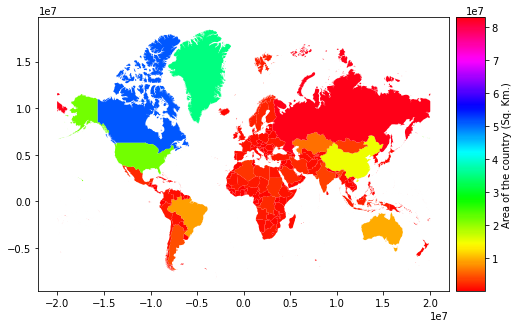

In [13]:
# Resizing the legend 
plt.clf
fig, ax = plt.subplots(figsize = (8,8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size = "7%", pad = 0.1)

world_data.plot(column = 'area' , cmap = 'hsv' , legend = True,  
                legend_kwds = {'label': "Area of the country (Sq. Km.)"}, 
                ax = ax, cax = cax)


In [14]:
%matplotlib inline


Plotting with Geoplot and GeoPandas
-----------------------------------

`Geoplot <https://residentmario.github.io/geoplot/index.html>`_ is a Python
library providing a selection of easy-to-use geospatial visualizations. It is
built on top of the lower-level `CartoPy <http://scitools.org.uk/cartopy/>`_,
covered in a separate section of this tutorial, and is designed to work with
GeoPandas input.

This example is a brief tour of the `geoplot` API. For more details on the
library refer to `its documentation
<https://residentmario.github.io/geoplot/index.html>`_.

First we'll load in the data using GeoPandas.


In [15]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

Plotting with Geoplot
=====================

We start out by replicating the basic GeoPandas world plot using Geoplot.



<AxesSubplot:>

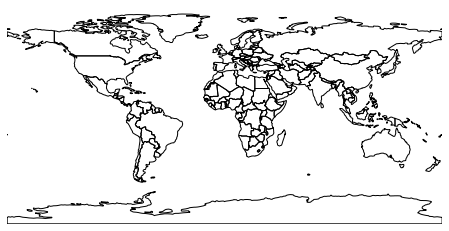

In [16]:
geoplot.polyplot(world, figsize=(8, 4))

Geoplot can re-project data into any of the map projections provided by
CartoPy (see the list
`here <http://scitools.org.uk/cartopy/docs/latest/crs/projections.html>`_).



/usr/local/lib/python3.8/site-packages/geoplot/geoplot.py:714: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  warnings.warn(
<ipython-input-17-bf31e6ff44d1>:5: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_visible(True)


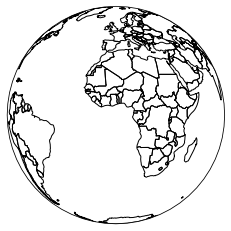

In [17]:
# use the Orthographic map projection (e.g. a world globe)
ax = geoplot.polyplot(
    world, projection=geoplot.crs.Orthographic(), figsize=(8, 4)
)
ax.outline_patch.set_visible(True)

``polyplot`` is trivial and can only plot the geometries you pass to it. If
you want to use color as a visual variable, specify a ``choropleth``. Here
we sort GDP per person by country into five buckets by color, using
"quantiles" binning from the `Mapclassify <https://pysal.org/mapclassify/>`_
library.



<AxesSubplot:>

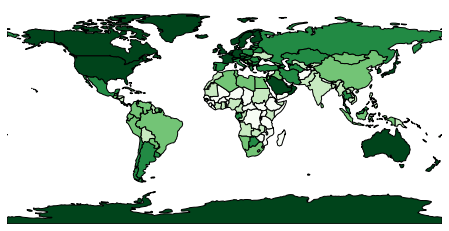

In [18]:
import mapclassify
gpd_per_person = world['gdp_md_est'] / world['pop_est']
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(8, 4)
)

If you want to use size as a visual variable, use a ``cartogram``. Here are
population estimates for countries in Africa.



<AxesSubplot:>

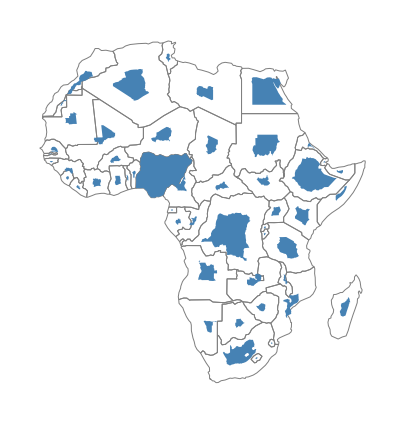

In [19]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(
    africa, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor='gray', ax=ax)

If we have data in the shape of points in space, we may generate a
three-dimensional heatmap on it using ``kdeplot``.



<GeoAxesSubplot:>

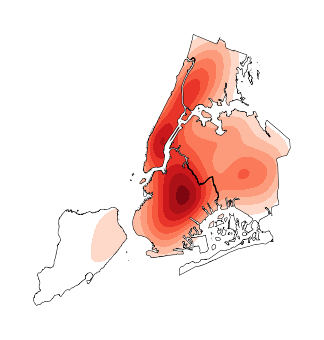

In [20]:
ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

Alternatively, we may partition the space into neighborhoods automatically,
using Voronoi tessellation. This is a good way of visually verifying whether
or not a certain data column is spatially correlated.



These are just some of the plots you can make with Geoplot. There are
many other possibilities not covered in this brief introduction. For more
examples, refer to the
`Gallery <https://residentmario.github.io/geoplot/gallery/index.html>`_ in
the Geoplot documentation.

